# Life Expectancy and GDP

This project is to analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

All data used is from the CodeAcademy life expectancy and GDP dataset

Countries included: ['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe']

Main Hypothesis: As GDP increases life expectancy will increase.

The aims of this project are to:

    1. Load data
    2. Create summary statistics
    3. Create initial visualisations to create visual observations of GDP and Life Expectancy over Time
        a. GDP over time
        b. GDP per country over time
        b. Life expectancy over time
        c. Life expectancy per country over time
    4. Create linear regression to determine association between GDP and Life Expectancy
    5. Summarise conclusions in relation to the hypothesis

In [45]:
# Import any relevant packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## 1.0 -  Load the Data

In [38]:
# Load the data
all_data = pd.read_csv('../data/all_data.csv')

In [39]:
# Check columns in data using head()
all_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [41]:
# update column name structure
all_data.rename(columns = {'Life expectancy at birth (years)':'Life_expectancy_at_birth'}, inplace=True)
list(all_data.columns)

['Country', 'Year', 'Life_expectancy_at_birth', 'GDP']

## 2.0 - Explore the Data

### 2.1 - Check Descriptive Statistics and Characteristics of the Data

In [19]:
# Get summary statistics of the data
all_data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


Life Expectancy Mean: 72.7

GDP Mean: 3.880499e+12

In [16]:
# Check countries being analysed
all_data['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

### 2.2 - Create initial visualisations

Country,Chile,China,Germany,Mexico,United States of America,Zimbabwe
Year,,,,,,
2000,7.786093e+10,1.211350e+12,1.949950e+12,6.836480e+11,1.030000e+13,6.689958e+09
2001,7.097992e+10,1.339400e+12,1.950650e+12,7.247040e+11,1.060000e+13,6.777385e+09
2002,6.973681e+10,1.470550e+12,2.079140e+12,7.415600e+11,1.100000e+13,6.342116e+09
2003,7.564346e+10,1.660290e+12,2.505730e+12,7.132840e+11,1.150000e+13,5.727592e+09
2004,9.921039e+10,1.955350e+12,2.819250e+12,7.702680e+11,1.230000e+13,5.805598e+09
2005,1.229650e+11,2.285970e+12,2.861410e+12,8.663460e+11,1.310000e+13,5.755215e+09
2006,1.547880e+11,2.752130e+12,3.002450e+12,9.652810e+11,1.390000e+13,5.443896e+09
2007,1.736060e+11,3.552180e+12,3.439950e+12,1.043470e+12,1.450000e+13,5.291950e+09
2008,1.796380e+11,4.598210e+12,3.752370e+12,1.101280e+12,1.470000e+13,4.415703e+09


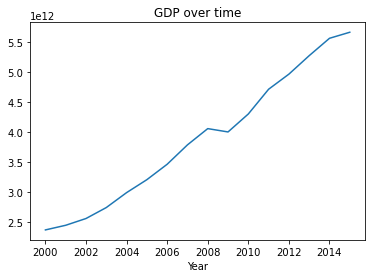

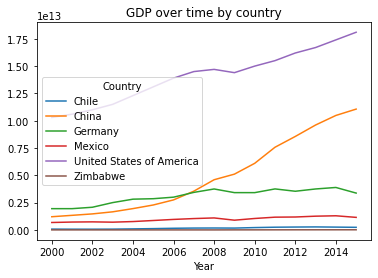

In [60]:
# GDP over time
avg_gdp = all_data.groupby('Year')['GDP'].agg('mean')
avg_gdp.plot()
plt.title('GDP over time')


 
# GDP over time per country
# pivot data
df = all_data.pivot(index='Year', columns='Country', values='GDP')
display(df)
# create subplot
df.plot()
plt.title('GDP over time by country')
 
# Display both subplots
plt.show()


Country,Chile,China,Germany,Mexico,United States of America,Zimbabwe
Year,,,,,,
2000,77.3,71.7,78.0,74.8,76.8,46.0
2001,77.3,72.2,78.3,75.0,76.9,45.3
2002,77.8,72.7,78.4,75.0,77.0,44.8
2003,77.9,73.1,78.5,75.0,77.2,44.5
2004,78.0,73.5,79.1,75.4,77.5,44.3
2005,78.4,73.9,79.2,75.3,77.5,44.6
2006,78.9,74.2,79.6,75.8,77.8,45.4
2007,78.9,74.4,79.8,76.0,78.1,46.6
2008,79.6,74.5,79.9,75.6,78.2,48.2


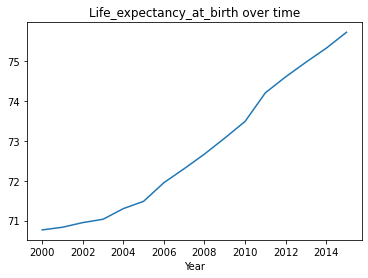

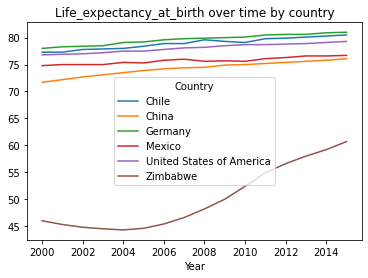

In [61]:
# Life expectancy over time
avg_gdp = all_data.groupby('Year')['Life_expectancy_at_birth'].agg('mean')
avg_gdp.plot()
plt.title('Life_expectancy_at_birth over time')


 
# Life_expectancy_at_birth over time per country
# pivot data
df = all_data.pivot(index='Year', columns='Country', values='Life_expectancy_at_birth')
display(df)
# create subplot
df.plot()
plt.title('Life_expectancy_at_birth over time by country')
 
# Display both subplots
plt.show()

Both life expectancy and GDP seem to increase generally over time in all countries. However, GDP seems to increase at a higher rate than Life Expectancy.

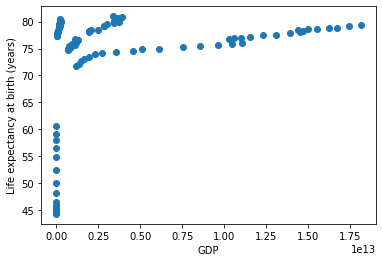

In [65]:
# Scatter plot GDP vs Life Expectancy
plt.scatter(x=all_data.GDP, y=all_data.Life_expectancy_at_birth)
plt.xlabel('GDP')
plt.ylabel('Life expectancy at birth (years)')
plt.show()


### 2.3 - Linear Regression

In [67]:
# Linear Regression
model = sm.OLS.from_formula('GDP ~ Life_expectancy_at_birth', data = all_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     12.55
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           0.000619
Time:                        21:00:45   Log-Likelihood:                -2940.5
No. Observations:                  96   AIC:                             5885.
Df Residuals:                      94   BIC:                             5890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               


## 3.0 - Conclusions

As shown in the line graph above both GDP and Life Expectancy have had a positive trend over time. In GDP there is considerably more growth in the same time period in the USA and China than all other included countries. However only Zimbabwe has a significant increase in life expectancy over time. However, this still remains well below the other countries over at the end of the time period in 2015.

Overall there also appears to be a positive correlation between GDP and Life expectancy, however using a regression model it shows a very low R2 value implying that there are likely many other components contributing to this correlation.

It would be interesting to look into further the other components involved in the change in life expectancy over time.
